In [1]:
import matplotlib.pyplot as plt
from mrcnn.model import MaskRCNN
from ..predict_config import PredictionConfig
from ..plot_predict import plot_actual_vs_predicted, plot_maskrcnn, plot_dataset
from mrcnn.model import mold_image
import numpy as np
from skimage import io
import timeit
import cv2
from mrcnn.visualize import apply_mask, random_colors

/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

# Prediction

In [2]:
model_weights_path = '../../../models/mask_rcnn_human_cfg_0005_3_train_test_val_human_mask.h5'
color_image_path = '../../../../../datasets/intro2CV_dataset/color/16.png'
depth_image_path = '../../../../../datasets/intro2CV_dataset/depth/16.png'

In [3]:
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model.load_weights(model_weights_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








Processing 1 images
image                    shape: (720, 1280, 3)        min: -123.70000  max:  151.10000  float64
molded_images            shape: (1, 1024, 1024, 3)    min: -247.40000  max:   47.20001  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[(1.0, 0.0, 0.0)]
(720, 1280)
uint16
<class 'numpy.ndarray'>


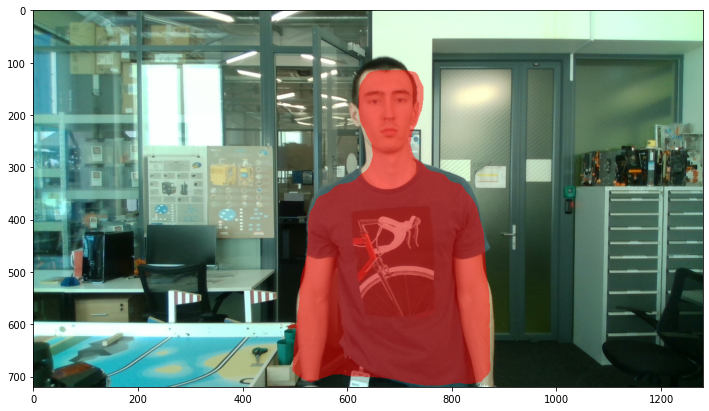

In [4]:
start_time = timeit.default_timer()

color_image = io.imread(color_image_path)
scaled_image = mold_image(color_image, cfg)
sample = np.expand_dims(scaled_image, 0)
yhat = model.detect(sample, verbose=1)[0]

depth_image = io.imread(depth_image_path)

boxes = yhat['rois']
masks = yhat['masks']
N = boxes.shape[0]
distances = [None] * N
positions = [None] * N
fig, ax = plt.subplots(figsize=[12, 12])
masked_image = color_image.copy()
colors = random_colors(N)
print(colors)
for i in range(N):
    box = boxes[i]
    mask = masks[:, :, i]

    masked_image = apply_mask(masked_image, mask, colors[i])

    print(depth_image.shape)
    print(depth_image.dtype)
    print(type(depth_image))
    depth_mask = depth_image.copy()
    depth_mask[mask == 0] = 0
    distances[i] = np.median(depth_mask[depth_mask > 0])
    positions[i] = [(box[0] + box[2]) / 2, (box[1] + box[3]) / 2]
    ax.imshow(masked_image)
end_time = timeit.default_timer()

In [5]:
print("Human distances:", distances)
print("Human positions:", positions)
print("Detection took: " + str(end_time - start_time) + " secs")


Human distances: [1318.0]
Human positions: [[417.5, 680.0]]
Detection took: 4.150433425998926 secs
